In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import sys
sys.path.append( '../relative_fitness_mechanisms/' )
import plot_utils
FIG_PATH = "../notebooks/figures/"

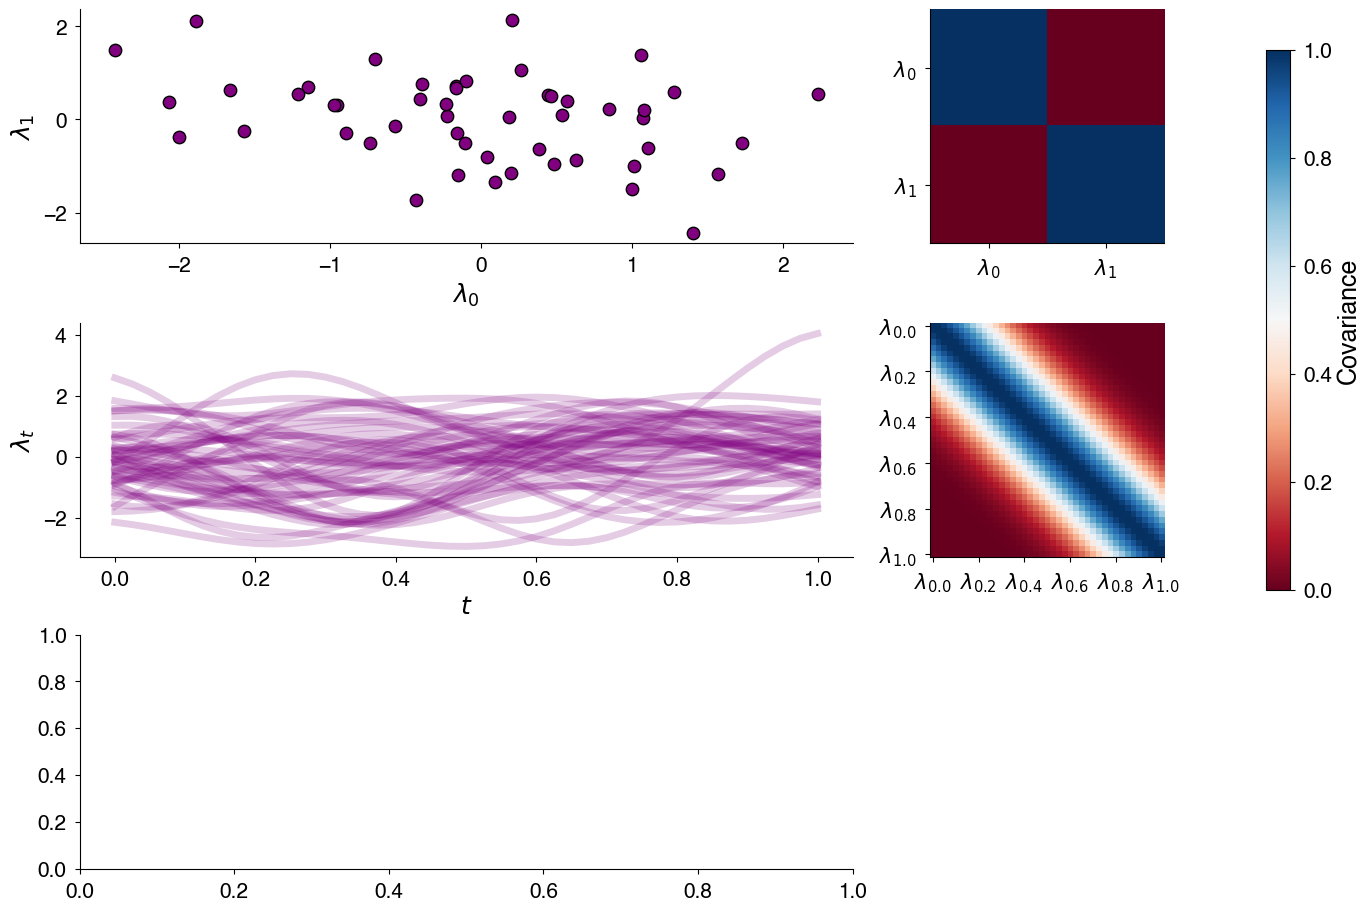

In [28]:
# Multivariate Gaussian
# Sampling nD from Gaussian process w/ covariance matrix as heatplot
from scipy.stats import multivariate_normal

fig = plt.figure(figsize=(12., 9.), constrained_layout=True)
spec = fig.add_gridspec(ncols=2, nrows=3, width_ratios=[1.0, 0.4])


## Panel A
ax_2d_scatter = fig.add_subplot(spec[0])

# Our 2-dimensional distribution will be over variables X and Y
N = 50

# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1]])


# The distribution on the variables X, Y packed into pos.
F = multivariate_normal(mu, Sigma)
Z = F.rvs(N)

ax_2d_scatter.scatter(Z[:,0], Z[:,1], ec="k", s=80, color="purple")
ax_2d_scatter.set_xlabel(r"$\lambda_{0}$")
ax_2d_scatter.set_ylabel(r"$\lambda_{1}$")

ax_2d_corr = fig.add_subplot(spec[1])
im=ax_2d_corr.imshow(Sigma, cmap='RdBu', vmin=0, vmax=1)
cbar_ax = fig.add_axes([1.05, 0.35, 0.02, 0.6])
fig.colorbar(im, cbar_ax, label="Covariance")
#ax_2d_corr.set_title(r"Covariance matrix")
ax_2d_corr.set_xticks([0, 1])
ax_2d_corr.set_yticks([0,1])
ax_2d_corr.set_xticklabels([r"$\lambda_{0}$", r"$\lambda_{1}$"])
ax_2d_corr.set_yticklabels([r"$\lambda_{0}$", r"$\lambda_{1}$"])

## Panel B

# Repeat for Gaussian Process
def SE_kernel(x, alpha, rho):
    return np.exp(- np.square(x - x[:, None]) / (2 * rho**2))
 
# Sample N GPs
ts = np.linspace(0, 1, 41)

Sigma = SE_kernel(ts, alpha=1.0, rho=0.2)
Z_gp = multivariate_normal(np.zeros_like(ts), Sigma, allow_singular=True).rvs(N)

ax_nd_plot = fig.add_subplot(spec[2])
ax_nd_plot.plot(ts, Z_gp.T, color="purple", alpha=0.2)

ax_nd_plot.set_ylabel(r"$\lambda_{t}$")
ax_nd_plot.set_xlabel(r"$t$")

ax_nd_corr = fig.add_subplot(spec[3])

im=ax_nd_corr.imshow(Sigma, cmap='RdBu', vmin=0, vmax=1)
#ax_nd_corr.set_title(r"Covariance matrix")

ticks = [*range(len(ts))][::8]
label_nums = [f"{t: .1f}" for t in ts[::8]]
labels = [r"$\lambda_{" + lb + "}$"  for lb in label_nums]

ax_nd_corr.set_xticks(ticks)
ax_nd_corr.set_yticks(ticks)
ax_nd_corr.set_xticklabels(labels)
ax_nd_corr.set_yticklabels(labels)

## Panel C
ax_nd_plot = fig.add_subplot(spec[4])


fig_gp = fig
#fig_gp.savefig(PRES_PATH + "gp_intro.svg", bbox_inches='tight')